In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('..')
import absorption_line_vel as vel
from absorption_line_vel import SpectrumSN_Lines, AbsorbLine

import numpy as np

# read spec data
z = 0.0307
spec = '../../spectroscopy/ZTF20aayhacx_20200609_GNIRS.ascii'
Spec1 = SpectrumSN_Lines(spec, z)

# 20200609_GNIRS

## He I 10830

<AxesSubplot:>

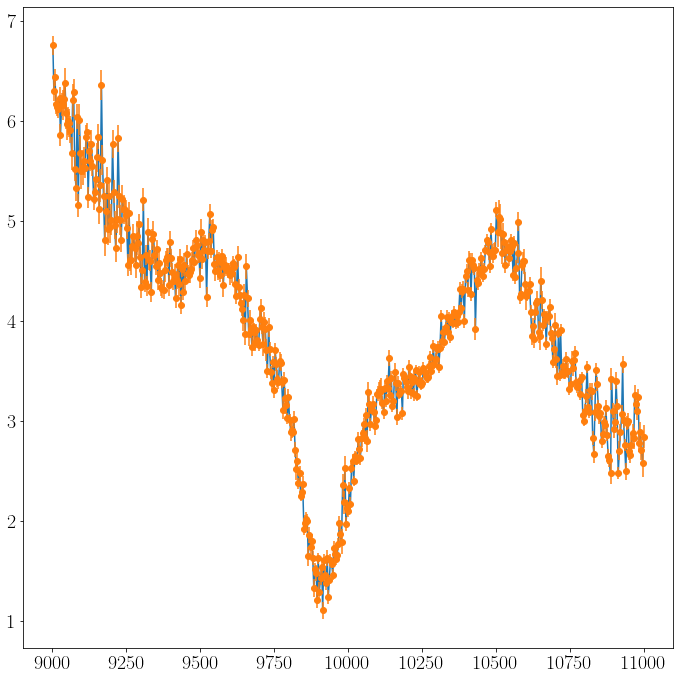

In [3]:
Spec1.plot_line_region(9000, 11000)

## He hvf + Fe II pvf

### Single Fe II line (10500)

In [4]:
Spec1.add_line('HeI_10830/FeII1',
               9450,
               10500,
               lines=[[10830], [10500]],
               rel_strength=[[], []])
Spec1.line['HeI_10830/FeII1'].LS_estimator(guess=(5, 5, -28000, 15, -2000,
                                                  -8000, 14, -2000))

281 points within 9450.00 and 10500.00 angstroms.
100
LS estimation:
Velocity 1: -26301 km/s
Velocity 2: -7771 km/s


Normalize factor = 2.295


100%|███████████████████████████████████████| 2000/2000 [00:20<00:00, 97.49it/s]


MCMC results:
Velocity 1: -26296 pm 47 km/s
Velocity 2: -7787 pm 125 km/s
Normalize factor = 2.296


  8%|███                                   | 4000/50000 [00:41<07:53, 97.19it/s]

MCMC results:
Velocity 1: -26312 pm 52 km/s
Velocity 2: -7771 pm 119 km/s


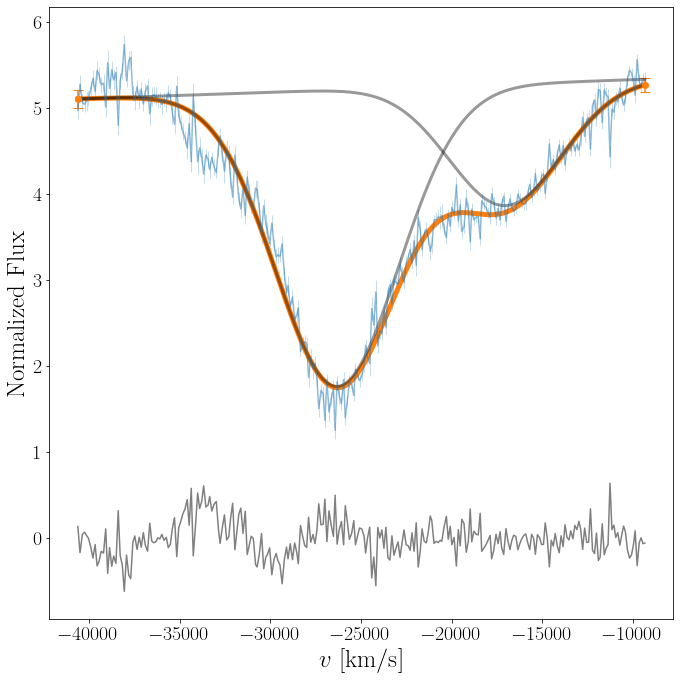

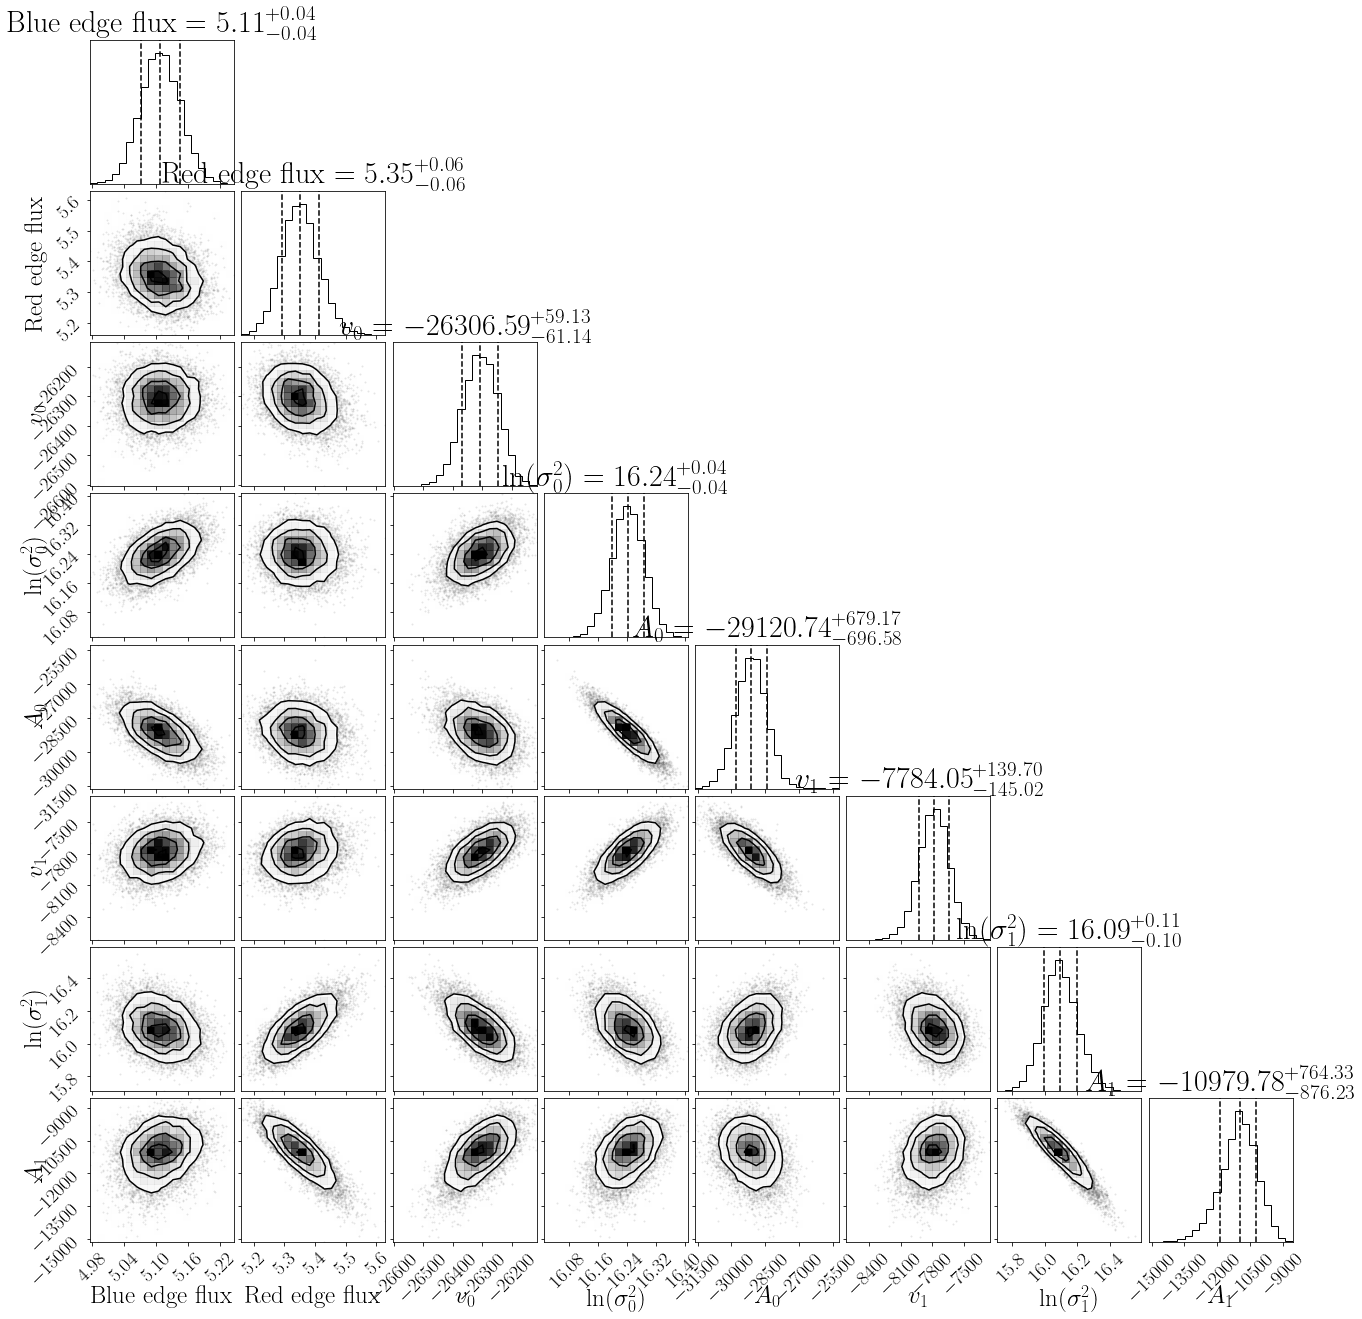

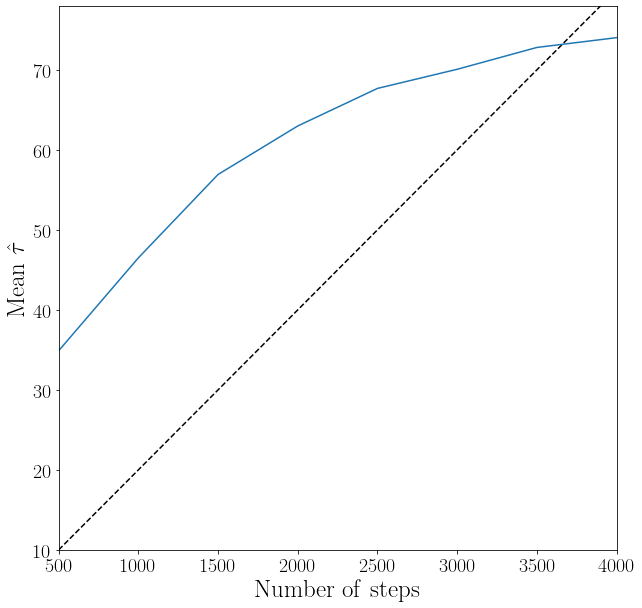

In [5]:
mu1 = -26000
mu2 = -8000
sampler = Spec1.line['HeI_10830/FeII1'].MCMC_sampler(
    mu_prior=[mu1, mu2],
    var_prior=[1e7, 1e7],
    var_max=1e10,
    initial=Spec1.line['HeI_10830/FeII1'].theta_LS,#[1, 1, -26000, 16, -5000, -8000, 16, -5000],
    normalize_unc='LS',
    max_nsteps=2000,
    Plot_model=False)
sampler = Spec1.line['HeI_10830/FeII1'].MCMC_sampler(
    mu_prior=[-26000, -8000],
    var_prior=[1e7, 1e7],
    initial=Spec1.line['HeI_10830/FeII1'].theta_MCMC,
    normalize_unc='MCMC',
    Plot_mcmc=True,
    Plot_tau=True)

### Two Fe II lines

In [6]:
Spec1.add_line('HeI_10830/FeII2',
               9450,
               10500,
               lines=[[10830], [9998, 10500]],
               rel_strength=[[], [.5, 1]],
               free_rel_strength=[False, True])
               #rel_strength=[[], [0.832, 0.521]])
Spec1.line['HeI_10830/FeII2'].LS_estimator(guess=(5, 5, -28000, 15, -2000,
                                                 -8000, 14, -2000))

281 points within 9450.00 and 10500.00 angstroms.
100
LS estimation:
Velocity 1: -15789 km/s
Velocity 2: -17354 km/s


Normalize factor = 2.907


100%|███████████████████████████████████████| 5000/5000 [01:00<00:00, 82.27it/s]

MCMC results:
Velocity 1: -26116 pm 70 km/s
Velocity 2: -8335 pm 132 km/s


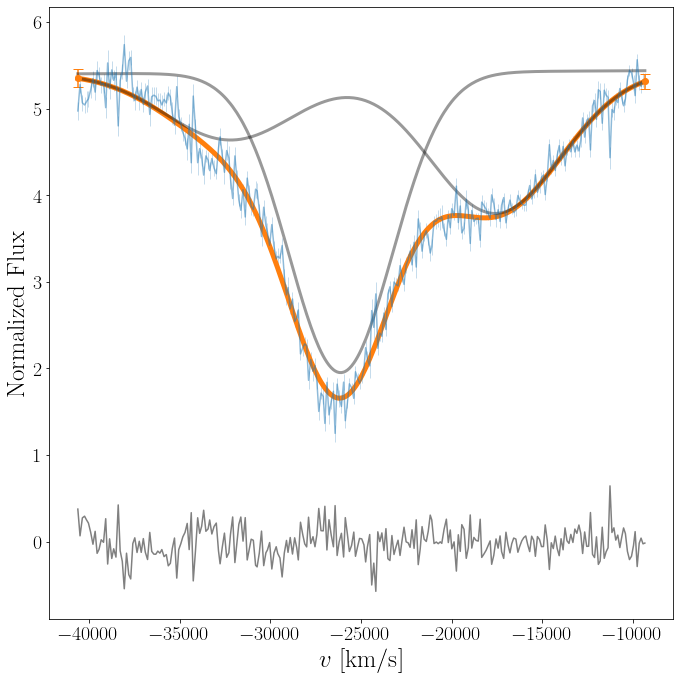

Normalize factor = 1.957


 10%|███▊                                  | 5000/50000 [01:00<09:08, 82.07it/s]

MCMC results:
Velocity 1: -26146 pm 55 km/s
Velocity 2: -8420 pm 105 km/s


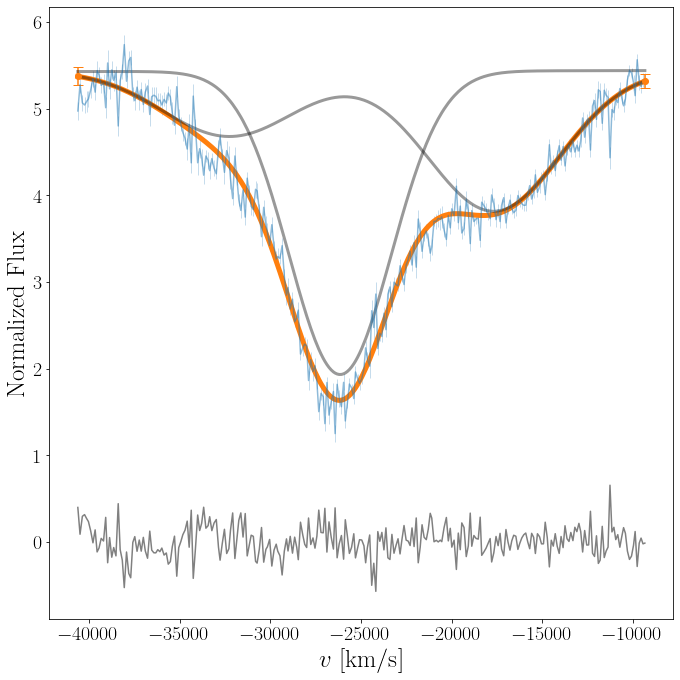

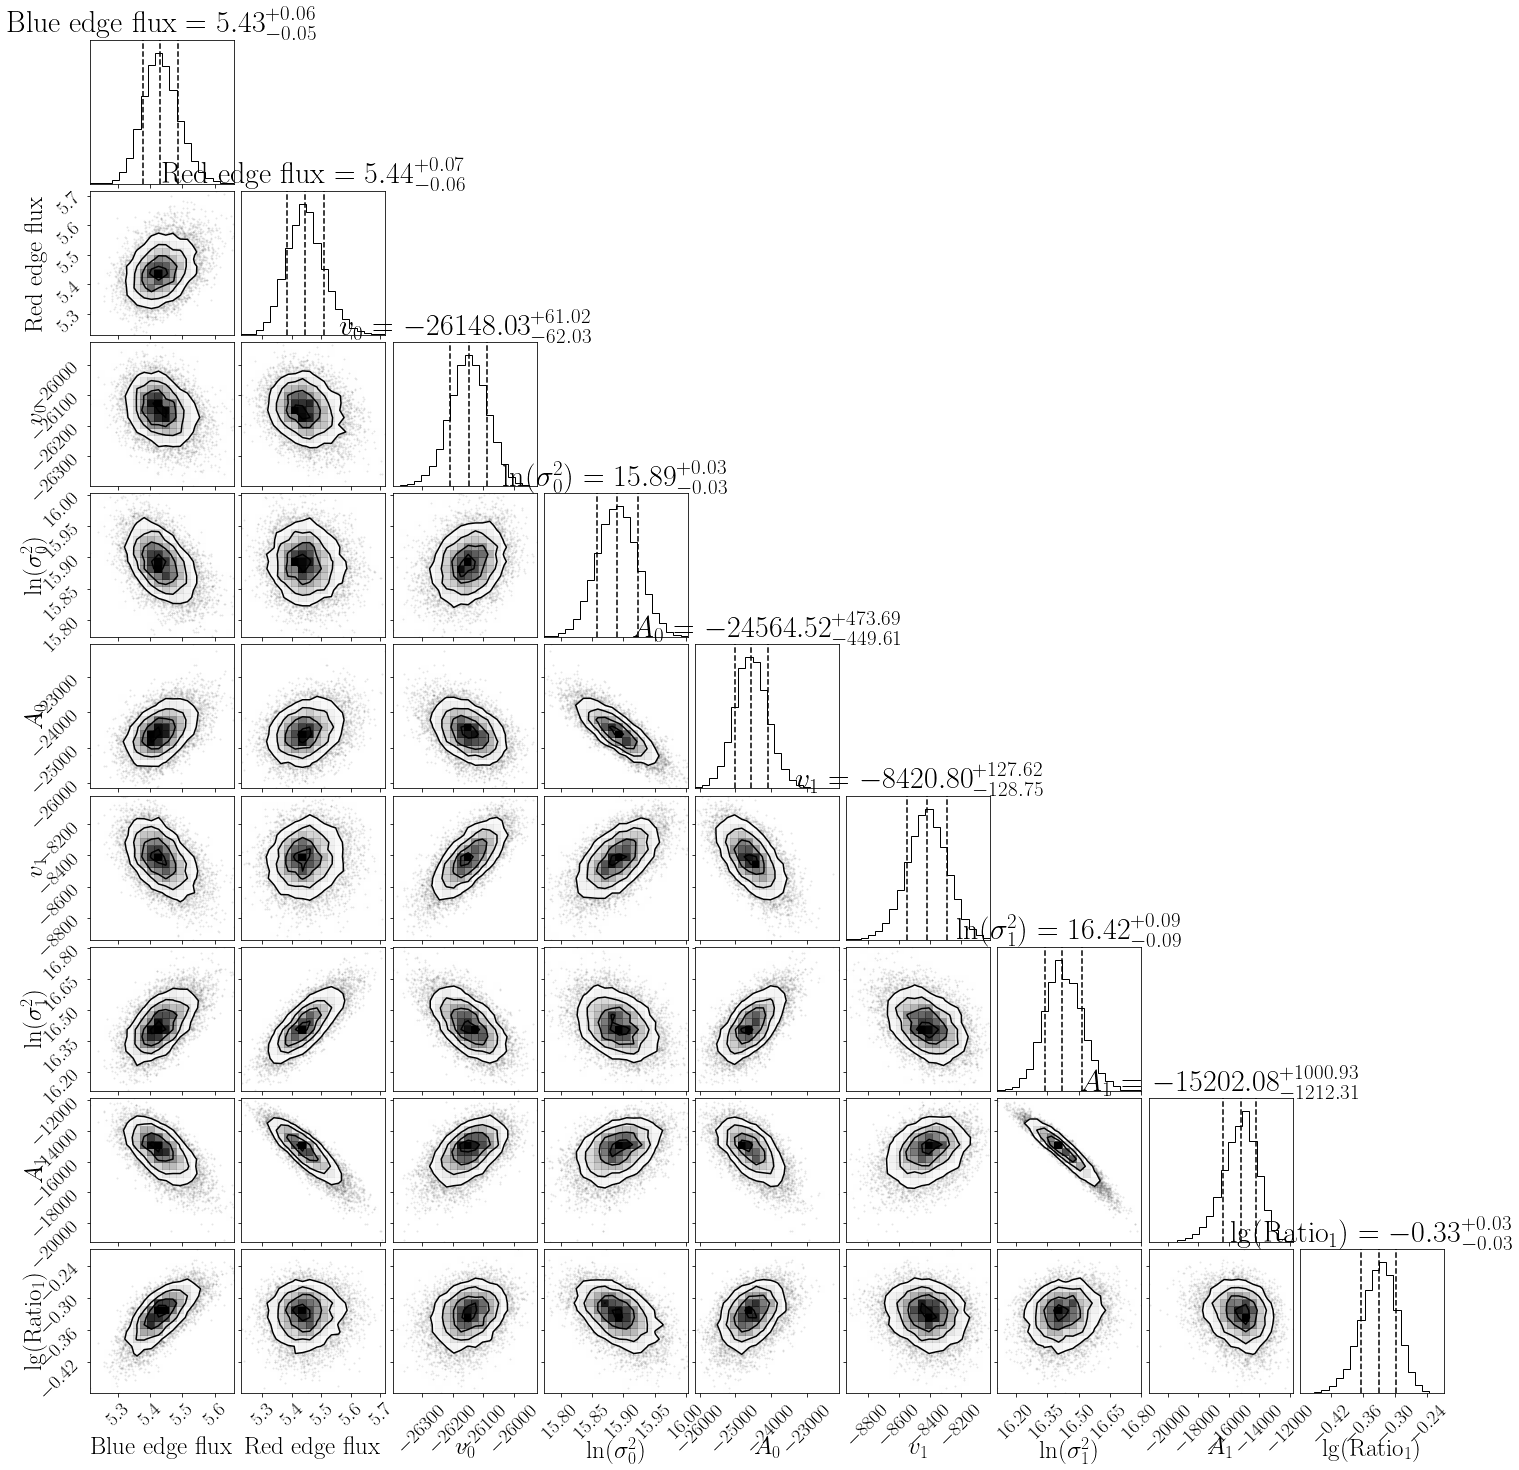

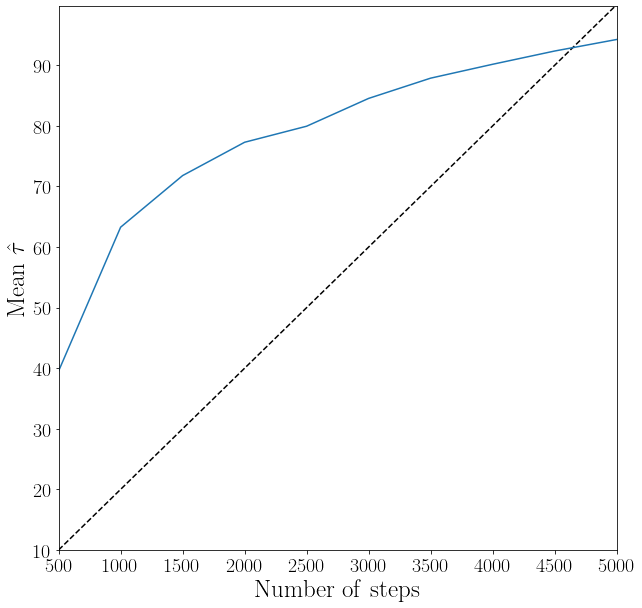

In [7]:
mu1 = -26000
mu2 = -8000
sampler = Spec1.line['HeI_10830/FeII2'].MCMC_sampler(
    mu_prior=[mu1, mu2],
    var_prior=[1e7, 1e5],
    var_max=1e10,
    initial=[5, 5, -28000, 15, -2000, -8000, 14, -2000],
    normalize_unc='LS',
    max_nsteps=5000,
    Plot_model=True)
sampler = Spec1.line['HeI_10830/FeII2'].MCMC_sampler(
    mu_prior=[mu1, mu2],
    var_prior=[1e7, 1e7],
    initial=Spec1.line['HeI_10830/FeII2'].theta_MCMC[:8],
    normalize_unc='MCMC',
    Plot_mcmc=True,
    Plot_tau=True)

### Three Fe II lines

In [ ]:
Spec1.add_line('HeI_10830/FeII3',
               9300,
               10600,
               lines=[[10830], [9998, 10500, 10863]],
               rel_strength=[[], [1, 1.5, 1]])
               #rel_strength=[[], [0.832, 0.521, 0.374]])

In [ ]:
mu1 = -26000
mu2 = -8000
sampler = Spec1.line['HeI_10830/FeII3'].MCMC_sampler(
    mu_prior=[mu1, mu2],
    var_prior=[1e7, 1e6],
    var_max=1e10,
    initial=Spec1.line['HeI_10830/FeII2'].theta_MCMC,
    normalize_unc='LS',
    max_nsteps=3000,
    Plot_model=False)
sampler = Spec1.line['HeI_10830/FeII3'].MCMC_sampler(
    mu_prior=[mu1, mu2],
    var_prior=[1e7, 1e6],
    initial=Spec1.line['HeI_10830/FeII3'].theta_MCMC,
    normalize_unc='MCMC',
    Plot_mcmc=True,
    Plot_tau=True)

## He I hvf + He I pvf

In [ ]:
Spec1.add_line('HeI_10830/HeI_10830',
               9500,
               10500,
               lines=[[10830], [10830]],
               rel_strength=[[1], [1]])
Spec1.line['HeI_10830/HeI_10830'].LS_estimator(guess=(1, 1, -25000, 15, -2000, -15000, 15, -2000))

In [ ]:
mu1 = -26000
mu2 = -17000
sampler = Spec1.line['HeI_10830/HeI_10830'].MCMC_sampler(
    mu_prior=[mu1, mu2],
    var_prior=[1e7, 1e7],
    var_max=1e10,
    initial=[1, 1, -26000, 16, -5000, -17000, 16, -5000],
    normalize_unc='LS',
    max_nsteps=1000,
    Plot_model=False)
sampler = Spec1.line['HeI_10830/HeI_10830'].MCMC_sampler(
    mu_prior=[-26000, -18000],
    var_prior=[1e7, 1e7],
    initial=Spec1.line['HeI_10830/HeI_10830'].theta_MCMC,
    normalize_unc='MCMC',
    Plot_mcmc=True,
    Plot_tau=True)

## C I 10693

In [8]:
vel.velocity_rf_line(10830, 10693, Spec1.line['HeI_10830/FeII2'].theta_MCMC[2])

-22354.531100244476

## Mg II 10927

In [9]:
vel.velocity_rf_line(10830, 10927, Spec1.line['HeI_10830/FeII2'].theta_MCMC[2])

-28796.789504374843

## He I 20581

(0.0, 1.5)

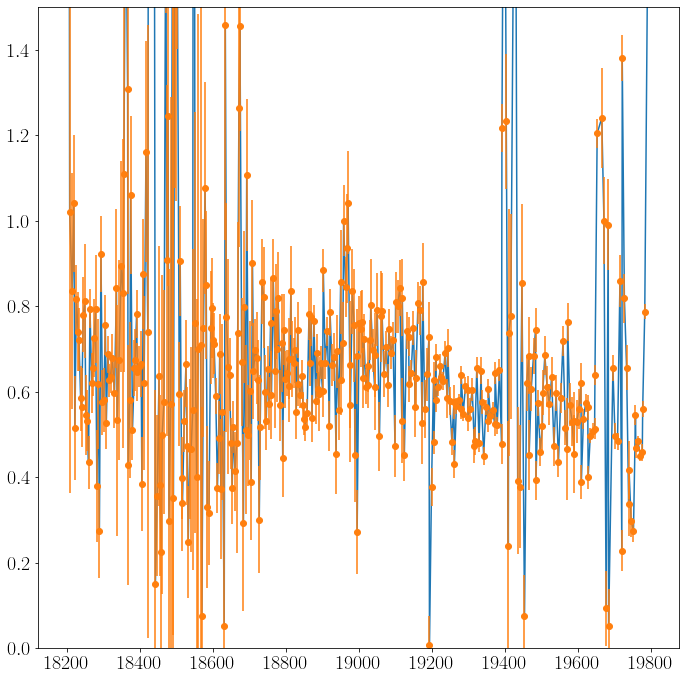

In [34]:
ax = Spec1.plot_line_region(18200, 19800)
ax.set_ylim(0, 1.5)

array([ 8.03305290e-01,  7.80261101e-01, -2.61460857e+04,  1.58848048e+01,
       -1.23454212e+03])

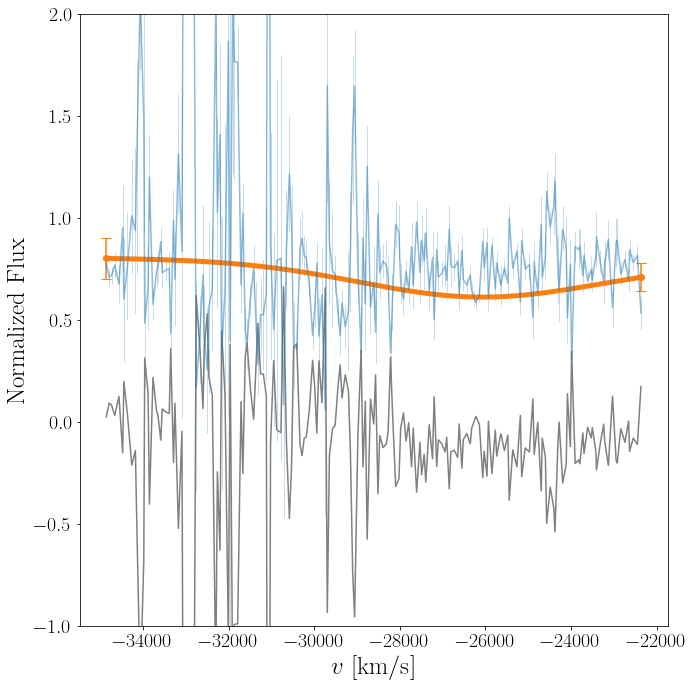

In [39]:
Spec1.add_line('HeI_20581', 18310, 19100, lines=[[20581]], rel_strength=[[1]])
theta_He2 = np.append(Spec1.line['HeI_20581'].blue_fl[0], Spec1.line['HeI_20581'].red_fl[0])
theta_He2 = np.append(theta_He2, Spec1.line['HeI_10830/FeII2'].theta_MCMC[2:5])
theta_He2[-1] *= 5e-2
ax = Spec1.line['HeI_20581'].plot_model(theta_He2, return_ax=True)
ax.set_ylim(-1, 2)
theta_He2

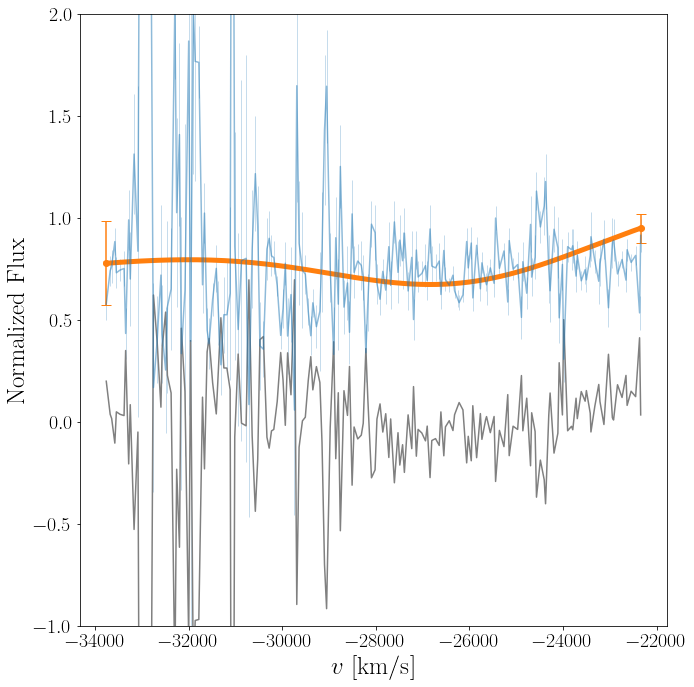

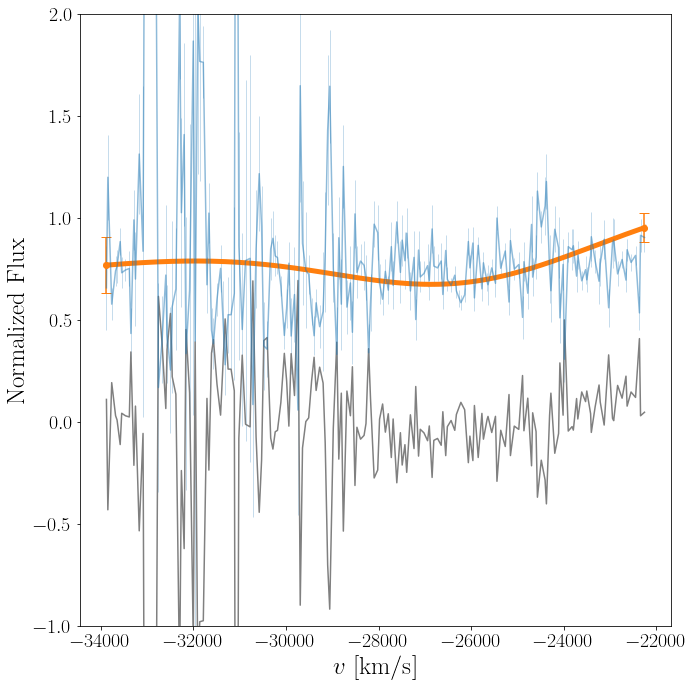

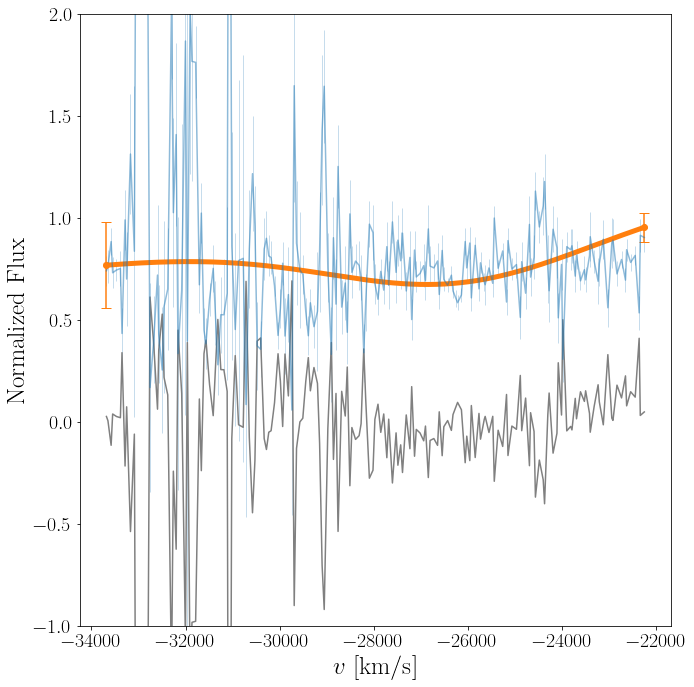

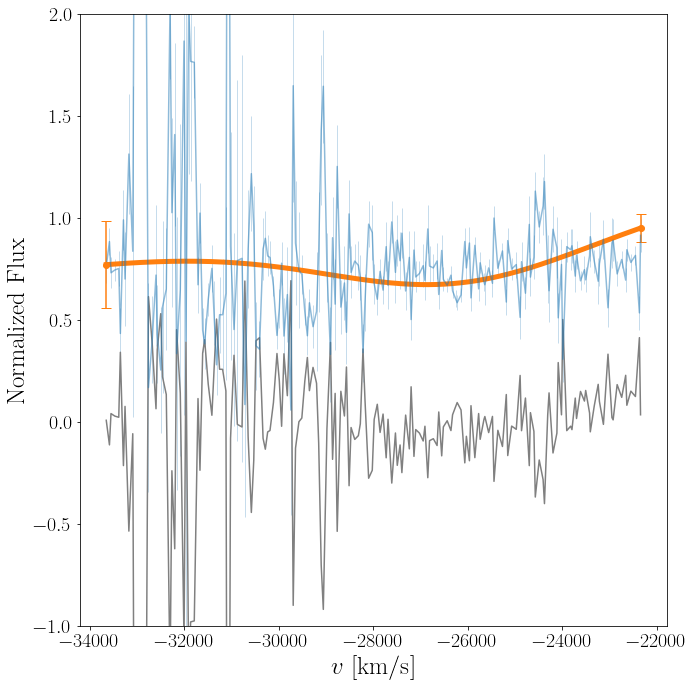

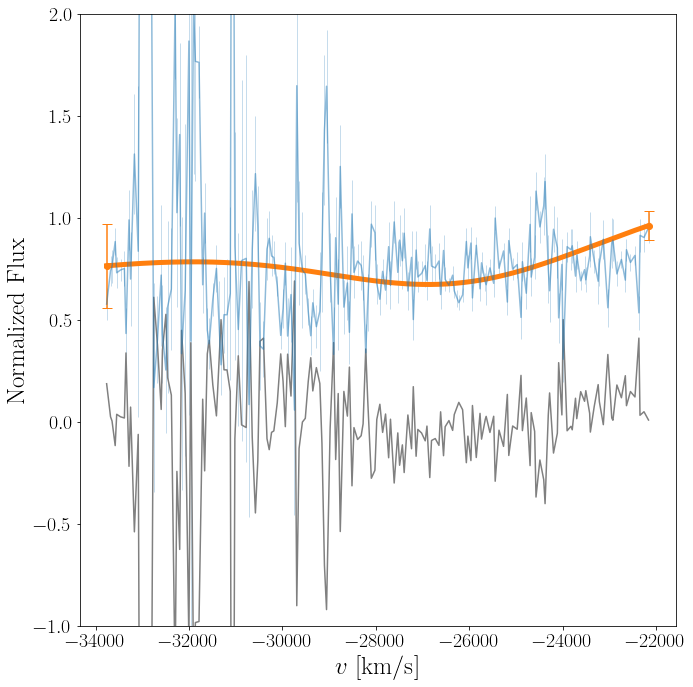

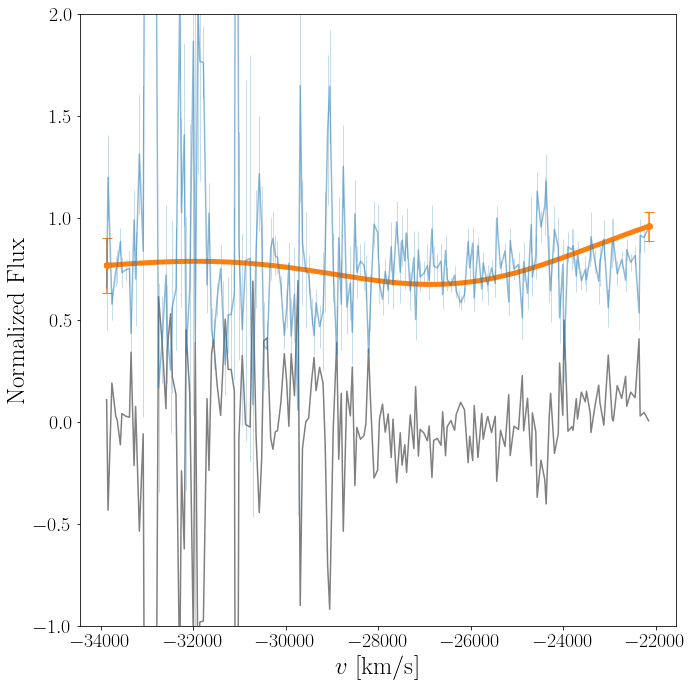

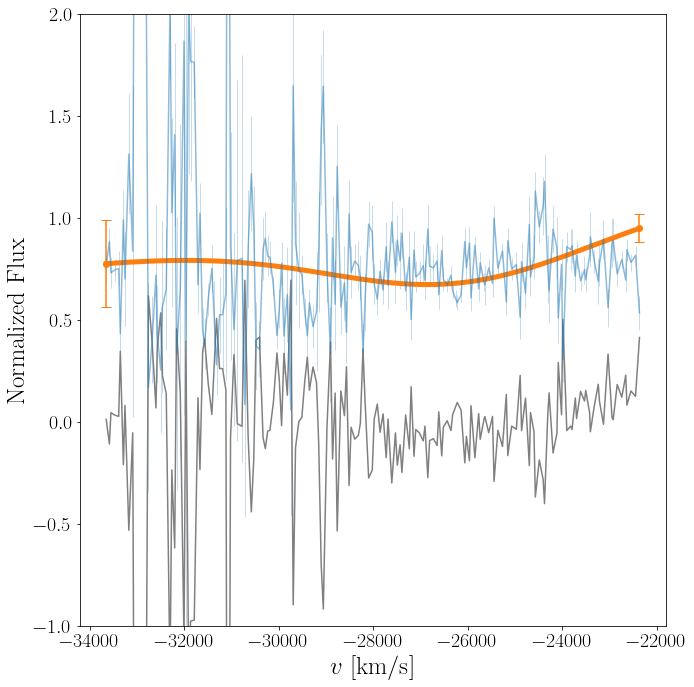

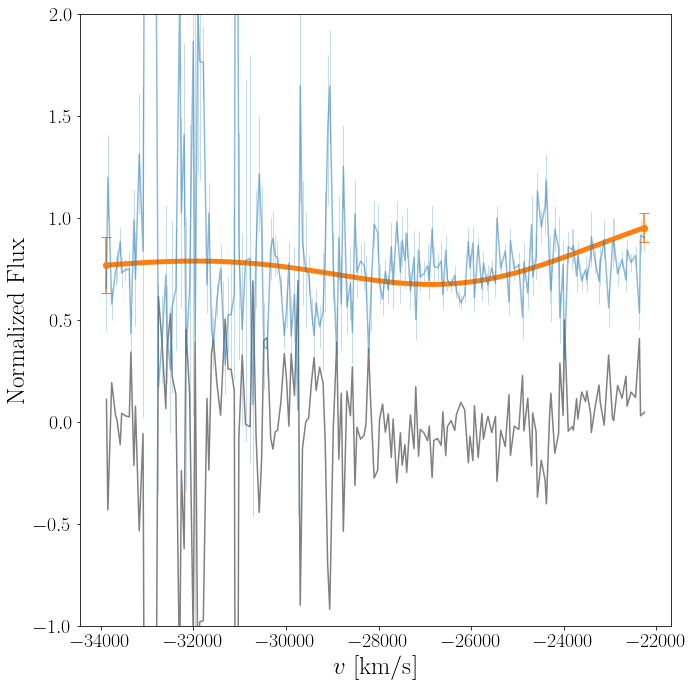

(array([13., 86., 72., 50.,  9.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  2.,  3.,  9.,  6.,  9.]),
 array([0.00825826, 0.01199199, 0.01572573, 0.01945946, 0.02319319,
        0.02692693, 0.03066066, 0.03439439, 0.03812813, 0.04186186,
        0.0455956 , 0.04932933, 0.05306306, 0.0567968 , 0.06053053,
        0.06426426, 0.067998  , 0.07173173, 0.07546547, 0.0791992 ,
        0.08293293]),
 [<matplotlib.patches.Polygon at 0x7f84421e1640>])

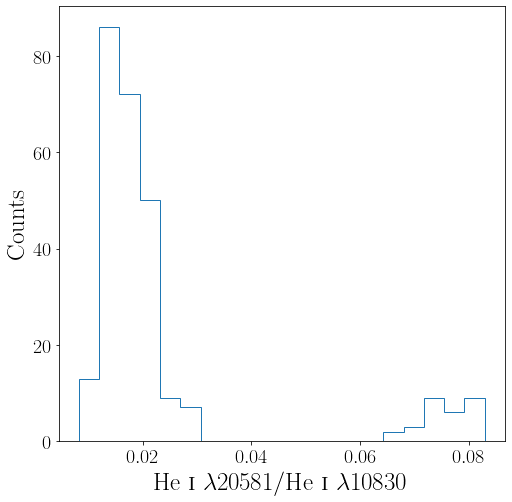

In [60]:
import matplotlib.pyplot as plt

red = np.random.rand(500) * 100 + 19100 # 19100-19200
blue = np.random.rand(500) * 100 + 18300 # 18300-18400

Ratio = []
for k in range(500):
    Spec1.add_line('HeI_20581', blue[k], red[k], lines=[[20581]], rel_strength=[[1]])
    He2 = Spec1.line['HeI_20581']
    Chi2_He2 = []
    ratio = np.linspace(-.05, .15, 1000)
    theta_He2 = np.append(Spec1.line['HeI_20581'].red_fl[0],
                          Spec1.line['HeI_20581'].blue_fl[0])
    theta_He2 = np.append(theta_He2,
                              Spec1.line['HeI_10830/FeII2'].theta_MCMC[2:5])
    for r in ratio:
        theta = theta_He2.copy()
        theta[-1] = theta[-1] * r
        chi2 = vel.neg_lnlike_gaussian_abs(theta, He2.rel_strength,
                                           He2.lambda_0, He2.blue_vel, He2.red_vel,
                                           He2.vel_rf, He2.norm_fl, He2.lines,
                                           He2.norm_fl_unc, 'chi2',
                                           He2.free_rel_strength) # / 1.95**2
        Chi2_He2 = np.append(Chi2_He2, chi2)
    #Chi2_He2 = Chi2_He2
    ratio = ratio[Chi2_He2 - Chi2_He2.min() < 25]
    Chi2_He2 = Chi2_He2[Chi2_He2 - Chi2_He2.min() < 25]
    if Chi2_He2.min()/len(Chi2_He2) > 6:
        continue
    Ratio.append(ratio[np.argmin(Chi2_He2)])
    if ratio[np.argmin(Chi2_He2)] > 0.08:
        theta = theta_He2.copy()
        theta[-1] = theta[-1] * ratio[np.argmin(Chi2_He2)]
        ax = Spec1.line['HeI_20581'].plot_model(theta, return_ax=True)
        ax.set_ylim(-1, 2)
        plt.show()

plt.figure(figsize=(8, 8))
plt.xlabel(
    r'$\mathrm{He}\ \textsc{i}\ \lambda 20581/\mathrm{He}\ \textsc{i}\ \lambda 10830$'
)
plt.ylabel(r'$\mathrm{Counts}$')
plt.hist(Ratio, histtype='step', bins=20)